In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
# Read the data
df = pd.read_csv("data/cleaned_data.csv", index_col =False)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [3]:
# Check for the null values
df.isnull().any().any()

False

### Prepare the dataset

In [4]:
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [5]:
print(f"X Shape {X.shape}")
print(f"y Shape {y.shape}")

print(f"X_train Shape {X_train.shape}")
print(f"y_train Shape {y_train.shape}")
print(f"X_test Shape {X_test.shape}")
print(f"y_test Shape {y_test.shape}")


X Shape (7043, 23)
y Shape (7043,)
X_train Shape (4930, 23)
y_train Shape (4930,)
X_test Shape (2113, 23)
y_test Shape (2113,)


### Taking care of the imbalance dataset

In [6]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(y_train.value_counts()))
print("The number of classes after fit {}".format(y_train_st.value_counts()))

# splitting the over sampling dataset again after the balanced dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.3)

The number of classes before fit Churn
0    3637
1    1293
Name: count, dtype: int64
The number of classes after fit Churn
1    2260
0    1925
Name: count, dtype: int64


#### Inference: 
* We can observe that the classes after churn is more balanced than the one before oversampling.

# Model Building
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier


## Logistic Regression

In [7]:
Log_reg_sampling = LogisticRegression(C=5)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9299363057324841
Confusion matrix :
 [[534  36]
 [ 52 634]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       570
           1       0.95      0.92      0.94       686

    accuracy                           0.93      1256
   macro avg       0.93      0.93      0.93      1256
weighted avg       0.93      0.93      0.93      1256



/Users/dhruvpatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [8]:

# decisionTree Classifier
Dt_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dt_sampling.fit(X_train_sap, y_train_sap)
dt_sampling_pred = Dt_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dt_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dt_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dt_sampling_pred, y_test_sap)}')

Accuracy score : 0.9171974522292994
Confusion matrix :
 [[522  40]
 [ 64 630]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       562
           1       0.94      0.91      0.92       694

    accuracy                           0.92      1256
   macro avg       0.92      0.92      0.92      1256
weighted avg       0.92      0.92      0.92      1256



## Random Forest

In [9]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9267515923566879
Confusion matrix :
 [[525  31]
 [ 61 639]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       556
           1       0.95      0.91      0.93       700

    accuracy                           0.93      1256
   macro avg       0.92      0.93      0.93      1256
weighted avg       0.93      0.93      0.93      1256



## Gradient Boosting 

In [10]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9347133757961783
Confusion matrix :
 [[534  30]
 [ 52 640]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       564
           1       0.96      0.92      0.94       692

    accuracy                           0.93      1256
   macro avg       0.93      0.94      0.93      1256
weighted avg       0.94      0.93      0.93      1256



In [11]:
param_grid = {'n_estimators':[100, 200, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

# Optimizing Hyperparameters
## Randomized Grid Search

In [12]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_depth=13, max_leaf_nodes=24, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=0.962 total time=   2.2s
[CV 2/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_depth=13, max_leaf_nodes=24, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=0.951 total time=   2.3s
[CV 3/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_depth=13, max_leaf_nodes=24, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=0.964 total time=   2.0s
[CV 4/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_depth=13, max_leaf_nodes=24, min_samples_leaf=5, min_samples_split=4, n_estimators=300;, score=0.961 total time=   2.1s
[CV 5/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_depth=13, max_leaf_nodes=24, min_samples_leaf=5, min_samples_s

/Users/dhruvpatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
375 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dhruvpatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dhruvpatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/dhruvpatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_par

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [13]:
gbc_optm.best_estimator_

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           loss='exponential', max_depth=13, max_leaf_nodes=24,
                           min_samples_leaf=5, min_samples_split=4,
                           n_estimators=300)

In [14]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=17,
                           max_leaf_nodes=12, min_samples_leaf=3,
                           min_samples_split=8, n_estimators=200)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9506369426751592
Confusion matrix :
 [[550  26]
 [ 36 644]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       576
           1       0.96      0.95      0.95       680

    accuracy                           0.95      1256
   macro avg       0.95      0.95      0.95      1256
weighted avg       0.95      0.95      0.95      1256



In [15]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=17,
                           max_leaf_nodes=12, min_samples_leaf=3,
                           min_samples_split=8, n_estimators=200)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1537
           1       0.65      0.49      0.56       576

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Accuracy   Score :  0.7889256980596309
Area under curve :  0.8230787564158172 



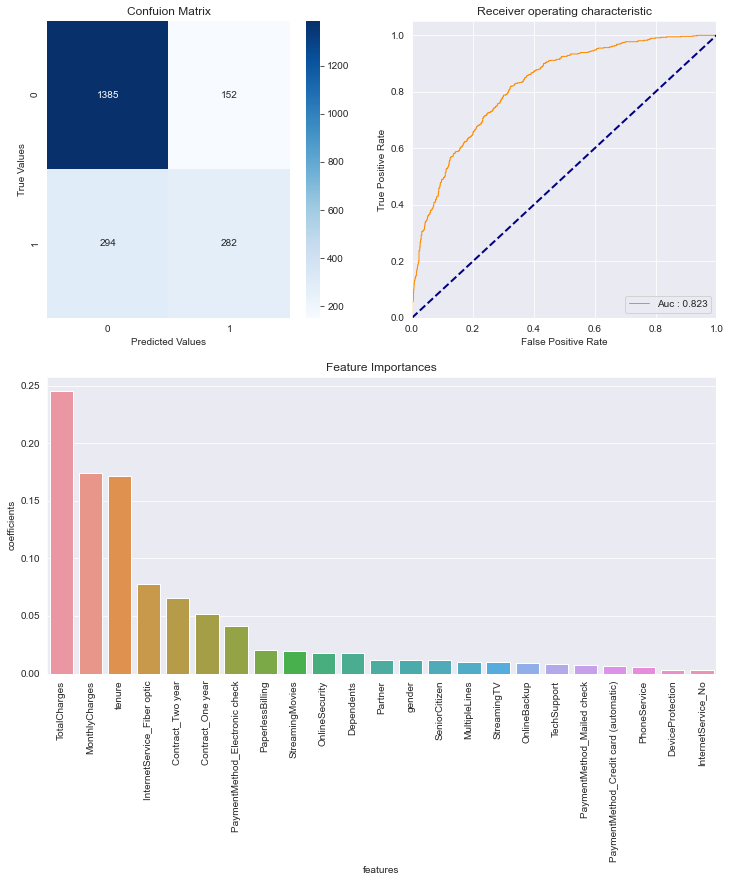

In [16]:
churn_prediction(gbc_tunning , X_train,y_train, X_test,  y_test, X.columns,"features")

In [17]:
# Checking the training score
train_scores = cross_val_score(gbc_tunning,X_train,y_train, cv = 10, scoring='f1')
train_scores

array([0.59504132, 0.53393665, 0.5       , 0.60606061, 0.58874459,
       0.51792829, 0.50655022, 0.59259259, 0.61864407, 0.59591837])

In [18]:
np.mean(train_scores)

0.5655416701632296

### Since our testing data and training F1-score is the same, we can conclude that there is no underfitting or overfitting

In [19]:
# Deploying the Model to Pickle file
import pickle
pickle.dump(gbc_tunning, open('model.pkl','wb'))